In [2]:
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import shape, Polygon

In [3]:
# Reduced AOI for baseline AOI
def get_zones(original_polygon, shrink_distance=0.0014):
    """
    Shrink polygon inward by fixed distance (degrees).
    """
    
    # Intersect with original (respect complex shape)
    reduced_aoi = original_polygon.buffer(-shrink_distance)
    no_go_zone = original_polygon.difference(reduced_aoi).buffer(0)
    
    baseline_aoi = gpd.GeoSeries([reduced_aoi])
    monitor_aoi = gpd.GeoSeries([original_polygon])
    no_go_zone_aoi = gpd.GeoSeries((original_polygon.difference(reduced_aoi)).buffer(0))

                                 
    return reduced_aoi, original_polygon, no_go_zone

In [8]:
## Get AOI's

# Get mine polygon
mine_id = 0
mine = gpd.read_file("content/mines/mines_cils.shp")
mine_sel = mine.iloc[[mine_id]]   # select one mine


# Maintain same CRS
if mine_sel.crs is None or mine_sel.crs.to_epsg() != 32644:
    mine_sel = mine_sel.to_crs(epsg=32644)

# get geometry
geom_sel = mine_sel.geometry.iloc[0]



baseline_aoi, monitor_aoi, no_go_zone_aoi = get_zones(geom_sel, shrink_distance=50)


/tmp/ipykernel_94572/6204299.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
/tmp/ipykernel_94572/6204299.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


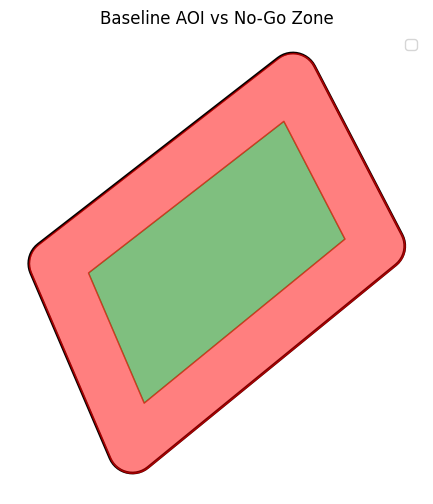

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Build GeoDataFrames
gdf_original = gpd.GeoDataFrame(
    {"zone": ["original"]},
    geometry=[monitor_aoi],
    crs="EPSG:32644"
)

gdf_baseline = gpd.GeoDataFrame(
    {"zone": ["baseline"]},
    geometry=[baseline_aoi],
    crs="EPSG:32644"
)

gdf_nogo = gpd.GeoDataFrame(
    {"zone": ["no_go"]},
    geometry=[no_go_zone_aoi],
    crs="EPSG:32644"
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

gdf_original.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2, label="Original AOI")
gdf_baseline.plot(ax=ax, facecolor="green", alpha=0.5, edgecolor="green", label="Baseline AOI")
gdf_nogo.plot(ax=ax, facecolor="red", alpha=0.5, edgecolor="red", label="No-Go Zone")

ax.set_title("Baseline AOI vs No-Go Zone")
ax.legend()
ax.set_aspect("equal")
ax.axis("off")

plt.show()


In [ ]:

# Parse AOI dict → shapely Polygon
AOI_polygon = shape(AOI)  # converts GeoJSON dict to shapely geometry

# Create reduced baseline AOI
baseline_aoi_reduced = get_zones(AOI_polygon, shrink_distance=0.0014)  # ~100m = 0.001



print(f"Original AOI valid: {AOI_polygon.is_valid}")
print(f"Reduced AOI valid: {baseline_aoi_reduced.is_valid}")
print(f"Area reduction: {100*(1 - baseline_aoi_reduced.area / AOI_polygon.area):.1f}%")